# *Proyecto Final Data Science*<br>
**-------------------------------**<br>
Dataset con datos del 2002 -> 2022<br>
Fuente: [Evolucion de Telefonos](https://www.kaggle.com/datasets/pranav941/evolution-of-smartphones)<br>
**-------------------------------**<br>
Estudiante: **Righes Marcos**


# **Objetivos e información general del proyecto**<br>
El dataset utilizado toma los datos generales de telefonos desde 2002 hasta 2022<br>
El objetivo principal de este proyecto es poder **encontrar** caracteristicas (componentes) similares entre estos telefonos y agruparlos para **categorizar** de esta manera a las marcas y sus productos como competencias / alternativas de compra para los usuarios.

Este proyecto pude ser de interés tanto a nivel usuario / consumidor como para nivel empresarial.<br>

Usuario ya que podremos ver las alternativas a modelos de ínteres personal, sabiendo que muchas veces los precios entre un producto y otro cambian por el nombre de quien lo vende, a pesar de que los componentes y calidad sean practicamente iguales.<br>

Empresarial ya que permite a las marcas saber quienes son su verdadera competencia segun los objetivos de producto que tengan, por otro lado se podra sacar conclusiones de que es lo que hace especial o popular a una marca u otra, permitiendo asi tomar conclusiones y respectivas acciones para llegar a igualar o superar a una marca objetivo. 


|Variables|Descripcion|Medida Expresada|
|--|--|--|
|Brand|Nombre de la marca del teléfono|--|
|Model|Nombre identicatorio del teléfono|--|
|OS|Sistema operativo de fabrica|--|
|Release_Date|Fecha de lanzamiento al mercado|month day, year|
|Battery|Capacidad de energía|mA|
|Processor|Procesador Incorporado|--|
|Memory|Capacidad de memoria RAM|GB|
|Primary_Storage|Capacidad de Almacenamiento Integrado|GB|
|External_Storage|Tipo de almacenamiento externo compatible|--|
|Display_Size|Tamaño de pantalla principal|inch (pulgadas)|
|Display_Resolution|Resolucion de la pantalla|pixels x pixels|
|Display_Refresh_Rate|Tasa de refresco de la pantalla|Hz|
|Primary_Camera|Calidad de la camara frontal|Mpx|
|Front_Camera|Calidad de la cámara trasera|Mpx|


Contamos para nuestras comparativas, con la participacion de 113 Marcas de telefonos, sin embargo no todas las marcas presentan todas las caracteristicas de sus celulares, por lo que las comparativas entre los mismos estarian incompletas si se usara los datos asociadas a estas marcas, por lo que realizando una limpieza solo 71 de ellas se utilizaron para el analisis<br>
Todo el dataset fue obtenido por una recopilacion colaborativa en Kaggle (Pagina web)

# Librerias

In [ ]:
#Importacion librerias
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
#Dataframe de Telefonos
df=pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQhiKIWZRZIWB_D3qPJQuHurMHWDA-3mLEABP8vylmrGRrulkE40PE_BsVbESWcG1rlwCkuJMuWv14o/pub?output=csv")

# Tratamiento de Nulos y transformacion de valores categoricos a numéricos

In [ ]:
#Visualizacion del Dataframe inicial
df.head(5)

,Brand,Model,OS,Release_Date,Battery,Processor,Memory,Primary_Storage,External_Storage,Display_Size,Display_Resolution,Display_Refresh_Rate,Primary_Camera,Front_Camera
0,ARCHOS,40 Cesium,Windows Phone 8.1,NaN,1950.0,Qualcomm Snapdragon 200,0.5,4.0,microSDXC,4.0,800 x 480,NaN,5.0,0.3
1,ARCHOS,40 Titanium,Android 4.2.2,NaN,1500.0,MediaTek,0.5,NaN,microSDHC,4.0,800 x 480,NaN,5.0,0.3
2,ARCHOS,40b Titanium,Android 4.2.2,NaN,1400.0,MediaTek,0.5,4.0,microSD,4.0,800 x 480,NaN,5.0,0.3
3,ARCHOS,45 Titanium,Android 4.2.2,NaN,1680.0,MediaTek,0.5,NaN,microSDHC,4.5,854 x 480,NaN,5.0,0.3
4,ARCHOS,45b Helium 4G,Android 4.4.4,NaN,1850.0,Qualcomm Snapdragon 410,0.5,4.0,microSDXC,4.5,854 x 480,NaN,5.0,0.3


In [ ]:
#Revisamos tipo de datos que tenemos y la cantidad de datos potenciales
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4537 entries, 0 to 4536
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 4537 non-null   object 
 1   Model                 4537 non-null   object 
 2   OS                    4519 non-null   object 
 3   Release_Date          2347 non-null   object 
 4   Battery               4368 non-null   float64
 5   Processor             3108 non-null   object 
 6   Memory                4065 non-null   float64
 7   Primary_Storage       3820 non-null   float64
 8   External_Storage      4168 non-null   object 
 9   Display_Size          4304 non-null   float64
 10  Display_Resolution    4455 non-null   object 
 11  Display_Refresh_Rate  310 non-null    float64
 12  Primary_Camera        4438 non-null   float64
 13  Front_Camera          3304 non-null   object 
dtypes: float64(6), object(8)
memory usage: 496.4+ KB


In [ ]:
#Vemos la cantidad de nulos x columna
df.isnull().sum()

Brand                      0
Model                      0
OS                        18
Release_Date            2190
Battery                  169
Processor               1429
Memory                   472
Primary_Storage          717
External_Storage         369
Display_Size             233
Display_Resolution        82
Display_Refresh_Rate    4227
Primary_Camera            99
Front_Camera            1233
dtype: int64

<Axes: >

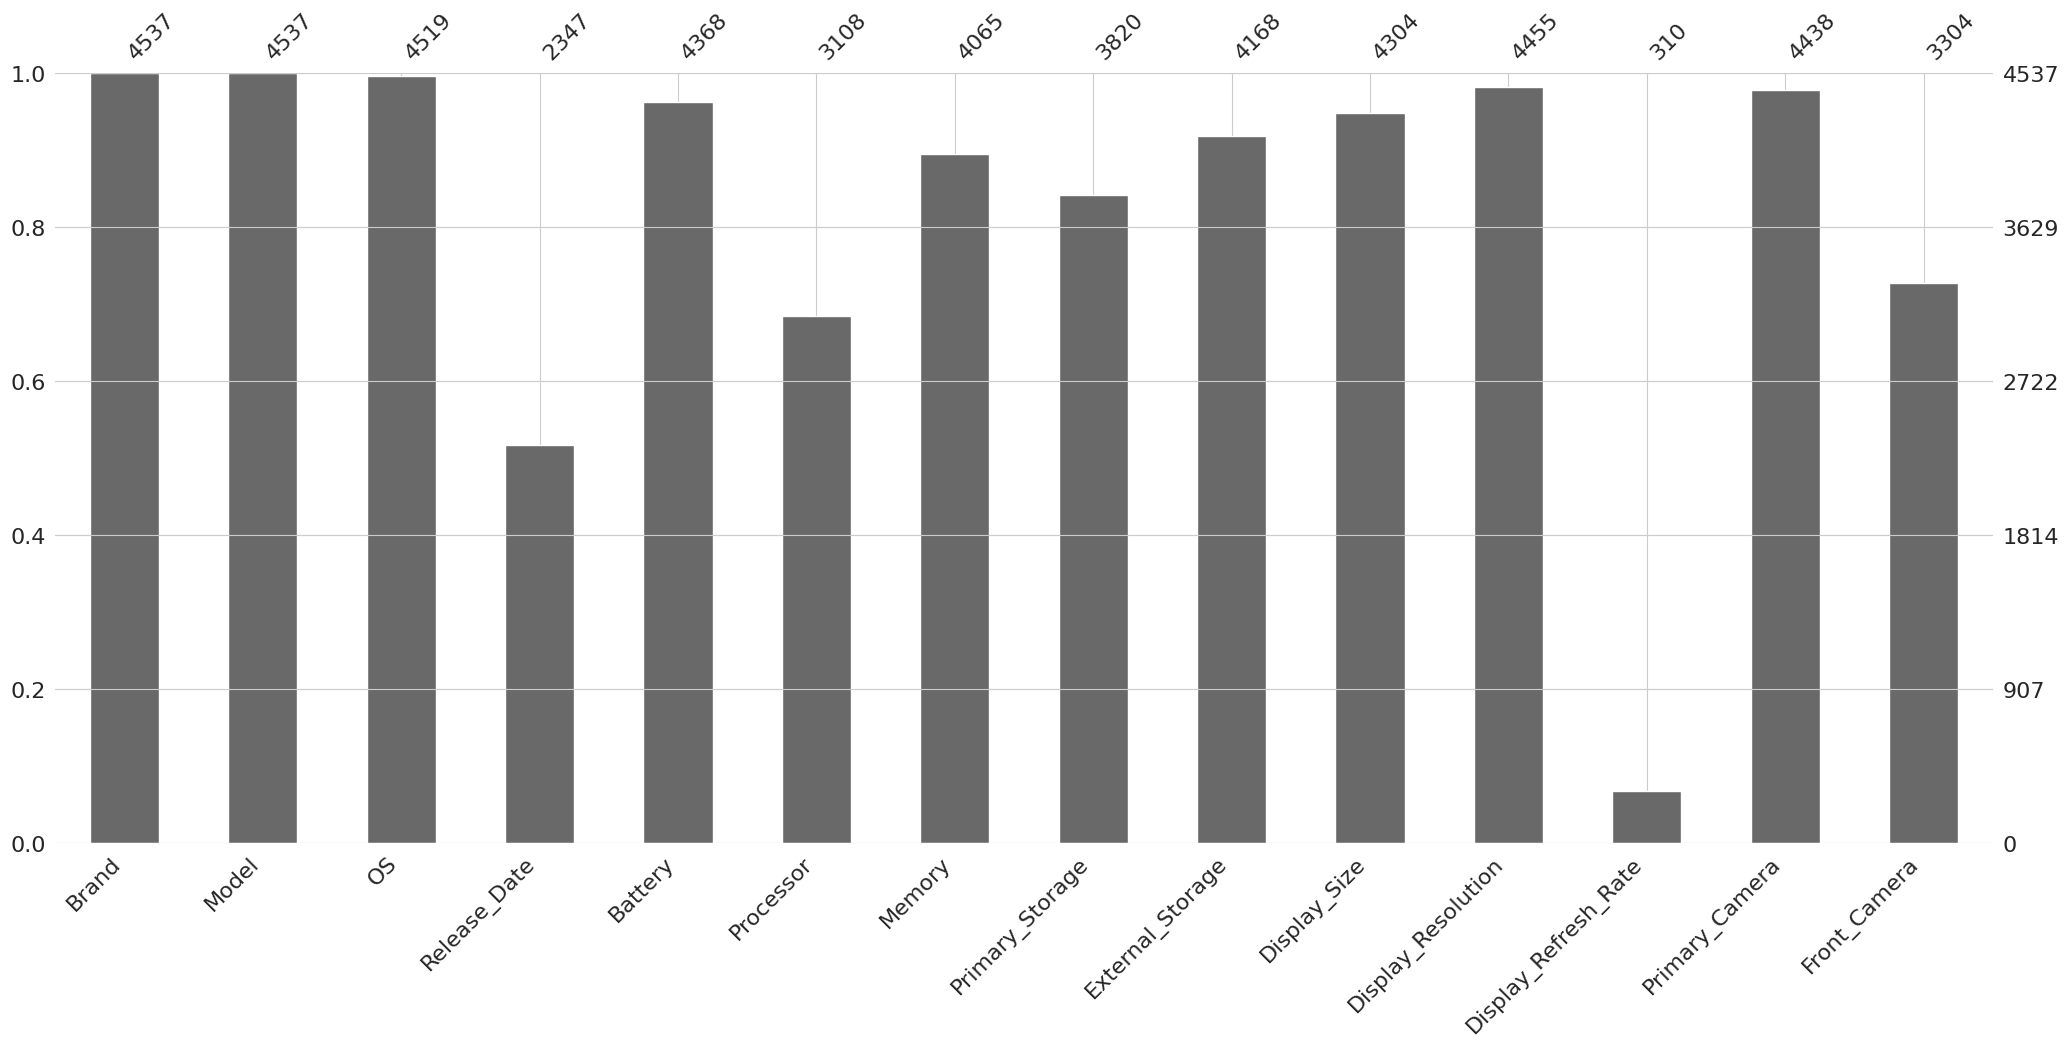

In [ ]:
#Para tener una mejor visualizacion, se realiza un grafico de nulos sobre el dataset
msno.bar(df)

In [ ]:
#Teniendo en cuenta que se busca caracterizar por los componentes físicos y por la falta de datos del mas del 40% para algunas columnas,se decide eliminar columnas que se consideran innecesarias para el trabajo
df.drop(columns=['Release_Date','Display_Refresh_Rate',],inplace=True)

In [ ]:
#Reemplazo de valores incoherentes en la columna Front Camara
df.Front_Camera.replace(to_replace=["QCIF (176x144)","0.1 MP CIF (288x352)"], value=[0.3,0.1],inplace=True)
df.Front_Camera=df.Front_Camera.astype(float)

In [ ]:
#Tratamiento de nulos para columnas NUMERICAS y relleno con valores medios de la tabla
for x in df.columns:
  if df[f'{x}'].isnull().sum() != 0:
    if df[f'{x}'].dtypes != 'O':
      mean=df[f'{x}'].mean()
      df[f'{x}'].fillna(mean,inplace=True)

In [ ]:
#Los nulos pendientes se relacionan a columnas CATEGORICAS / TEXTO
df.isnull().sum()

Brand                    0
Model                    0
OS                      18
Battery                  0
Processor             1429
Memory                   0
Primary_Storage          0
External_Storage       369
Display_Size             0
Display_Resolution      82
Primary_Camera           0
Front_Camera             0
dtype: int64

In [ ]:
#Debido a que los valores faltantes presentan caracteristicas importantes, se los dropea y no rellena
df.dropna(inplace=True)
df_text=pd.DataFrame.copy(df) #Se crea una copia del dataframe, pero manteniendo las columnas sin encoding para referencias futuras y comparaciones
df.drop(columns='Model')#Se elimina la columna de Modelo, la cual solo se mantuvo para realizar una copia en otro DataFrame

,Brand,OS,Battery,Processor,Memory,Primary_Storage,External_Storage,Display_Size,Display_Resolution,Primary_Camera,Front_Camera
0,ARCHOS,Windows Phone 8.1,1950.0,Qualcomm Snapdragon 200,0.5,4.000000,microSDXC,4.0,800 x 480,5.0,0.3
1,ARCHOS,Android 4.2.2,1500.0,MediaTek,0.5,34.296597,microSDHC,4.0,800 x 480,5.0,0.3
2,ARCHOS,Android 4.2.2,1400.0,MediaTek,0.5,4.000000,microSD,4.0,800 x 480,5.0,0.3
3,ARCHOS,Android 4.2.2,1680.0,MediaTek,0.5,34.296597,microSDHC,4.5,854 x 480,5.0,0.3
4,ARCHOS,Android 4.4.4,1850.0,Qualcomm Snapdragon 410,0.5,4.000000,microSDXC,4.5,854 x 480,5.0,0.3
...,...,...,...,...,...,...,...,...,...,...,...
4532,vivo,Android 9.0 Pie,5000.0,Qualcomm Snapdragon 439,3.0,32.000000,microSDXC,6.3,1544 x 720,13.0,8.0
4533,vivo,Android 9.0 Pie,5000.0,MediaTek Helio P65,4.0,128.000000,microSDXC,6.5,2340 x 1080,16.0,16.0
4534,vivo,Android 8.1 Oreo,3260.0,MediaTek Helio P22,4.0,64.000000,microSDXC,6.2,1520 x 720,13.0,8.0
4535,vivo,Android 8.1 Oreo,4030.0,MediaTek Helio P22,2.0,32.000000,microSDXC,6.2,1520 x 720,13.0,8.0


In [ ]:
#Encoding de las columnas categóricas Brand-Processor-Storage-DisplayRes
encoder=LabelEncoder()
df.Brand=encoder.fit_transform(df.Brand)
df.Processor=encoder.fit_transform(df.Processor)
df.External_Storage=encoder.fit_transform(df.External_Storage)
df.Display_Resolution=encoder.fit_transform(df.Display_Resolution)

In [ ]:
#De esta manera ahora tenemos un dataframe completamente numérico y tratado, listo para ser utilizado
df.drop(columns='OS',inplace=True)

In [ ]:
#Dataframe con las columnas categoricas transformadas
df.head(5)

,Brand,Model,Battery,Processor,Memory,Primary_Storage,External_Storage,Display_Size,Display_Resolution,Primary_Camera,Front_Camera
0,0,40 Cesium,1950.0,135,0.5,4.000000,5,4.0,111,5.0,0.3
1,0,40 Titanium,1500.0,46,0.5,34.296597,4,4.0,111,5.0,0.3
2,0,40b Titanium,1400.0,46,0.5,4.000000,3,4.0,111,5.0,0.3
3,0,45 Titanium,1680.0,46,0.5,34.296597,4,4.5,112,5.0,0.3
4,0,45b Helium 4G,1850.0,140,0.5,4.000000,5,4.5,112,5.0,0.3


In [ ]:
#DataFrame sin el encoding
df_text.head(5)

,Brand,Model,OS,Battery,Processor,Memory,Primary_Storage,External_Storage,Display_Size,Display_Resolution,Primary_Camera,Front_Camera
0,ARCHOS,40 Cesium,Windows Phone 8.1,1950.0,Qualcomm Snapdragon 200,0.5,4.000000,microSDXC,4.0,800 x 480,5.0,0.3
1,ARCHOS,40 Titanium,Android 4.2.2,1500.0,MediaTek,0.5,34.296597,microSDHC,4.0,800 x 480,5.0,0.3
2,ARCHOS,40b Titanium,Android 4.2.2,1400.0,MediaTek,0.5,4.000000,microSD,4.0,800 x 480,5.0,0.3
3,ARCHOS,45 Titanium,Android 4.2.2,1680.0,MediaTek,0.5,34.296597,microSDHC,4.5,854 x 480,5.0,0.3
4,ARCHOS,45b Helium 4G,Android 4.4.4,1850.0,Qualcomm Snapdragon 410,0.5,4.000000,microSDXC,4.5,854 x 480,5.0,0.3


#Exploracion de Datos y correlaciones

En primera instancia buscamos caracteristicas que resalten en los datos para cada variable.<br>


In [ ]:
#Tomamos las columnas numéricas para analizar sus comportamientos
df_num=df.drop(columns=['Model','Brand','Processor','External_Storage','Display_Resolution']) 
df_num.describe()

,Battery,Memory,Primary_Storage,Display_Size,Primary_Camera,Front_Camera
count,2816.000000,2816.000000,2816.000000,2816.000000,2816.000000,2816.000000
mean,2790.660751,3.505840,42.457322,5.112422,14.874698,6.902774
std,1171.786530,21.028621,61.565924,1.043851,17.361912,6.958113
min,750.000000,0.020000,0.000000,2.000000,0.000000,0.300000
25%,1900.000000,1.000000,8.000000,4.500000,5.000000,2.000000
50%,2540.000000,2.000000,16.000000,5.000000,8.000000,5.000000
75%,3500.000000,4.000000,64.000000,6.000000,13.000000,8.000000
max,8580.000000,512.000000,512.000000,10.100000,108.000000,44.000000


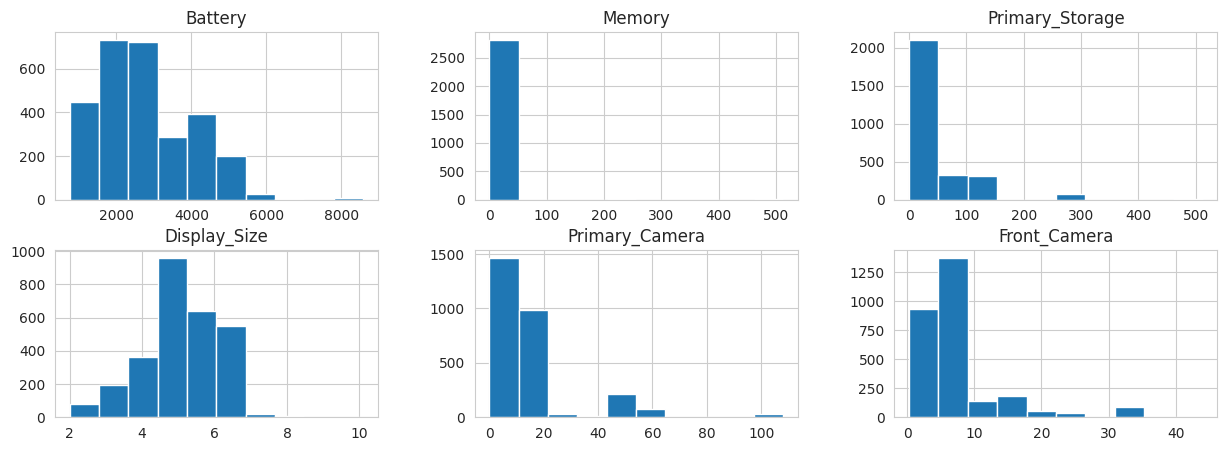

In [ ]:
#Graficamos los histogramas para cada variable
df_num.hist(layout=[2,3],figsize=[15,5])
plt.show()

Teniendo en cuenta que todas las variables son numéricas de tipo continua, podemos visualizar la distribucion de frecuencias por medio de intervalos en el grafico.

Realizado los histogramas para cada columna numérica del Dataframe, podemos visualizar mejor el comportamiento de cada variable con respecto a sus datos.
Las frecuencias mas distribuidas podemos ver que son la de batería y el tamaño display.

Tambien se visualiza la aparicion de valores extremos / atipicos en los datos, seguramente pertenecientes a modelos mas alta gama dentro del set de datos.

Se continua con un mapa de correlaciones lineales entre variables y se toman algunas variables para comparar.

<ipython-input-217-9aac61094fbe>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-217-9aac61094fbe>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'Mapa de Correlacion Lineal')

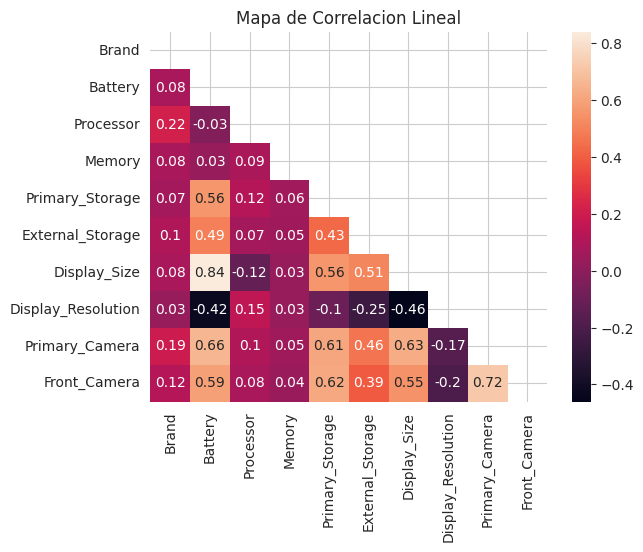

In [ ]:
#Realizamos un mapa de correlacion
#Se crea una mascara para ocultar los valores espejo del grafico y asi tener mas limpio la visualizacion
mask= np.triu(df.corr())

sns.heatmap(df.corr().round(2),annot=True,mask=mask)
plt.title('Mapa de Correlacion Lineal')

Relaciones interesantes que obtenemos:<br>

|Componentes|Correlacion Lineal|Intensidad de Correlacion|
|--|--|--|
|Display Size x Battery|r = 0.84|Directa Alta|
|Front Camera x Primary Camera | r = 0.72 |Directa Alta|<br>

Los dos valores mas alto de correlacion lineal que obtuvimos

# Insights


## Correlaciones -- Grafico y analisis

## Camara Trasera X Camara Frontal

Unas de las observaciones generales que se obtuvo, es la correlacion lineal entre la 'Calidad' / Pixeles de una camara trasera en relacion a la camara frontal, siendo esta ultima en su mayoria inferior o igual a la otra.

Solo para recordar, el coeficiente de correlacion lineal de este caso es: 0.72

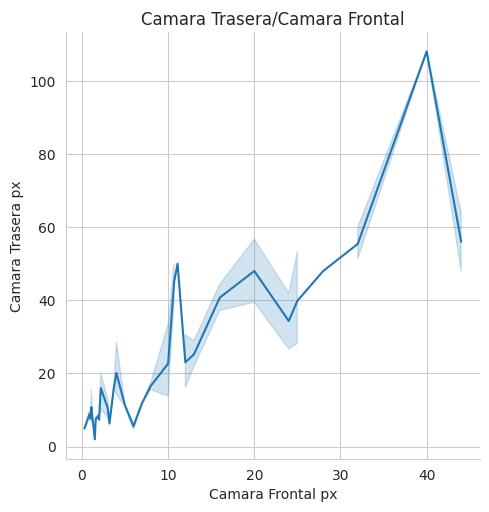

In [ ]:
sns.relplot(data=df,
            x='Front_Camera',
            y="Primary_Camera",
            kind="line"
            )
sns.set_style("whitegrid")
plt.title("Camara Trasera/Camara Frontal")
plt.xlabel("Camara Frontal px")
plt.ylabel("Camara Trasera px")
plt.show()

Teniendo una visualizacion grafica de los valores, ya podemos ver un cierto comportamiento entre las variables de analisis.<br>

Algo interesante es que por lo general la camara trasera, presenta mayor calidad que la frontal.<br>

En la mayoria del tiempo, sacamos fotos a elementos externos a nosotros, por lo que es lógico que se haga incapie en obtener una mejor resolucion en las fotografias que sean hacia nuestro entorno y en menor medida para las fotos frontales.<br>

## Batería X Display

Siguiendo la dinámica de las observaciones anteriores, una de las relaciones mas fuertes de los componentes, es la capacidad de las baterias y el tamaño del display/pantalla.
Lo cual es bastante logico, debido a la alta demanda de consumo energetico que presenta tener constantemente prendida la pantalla y la actualizacion de los pixeles.

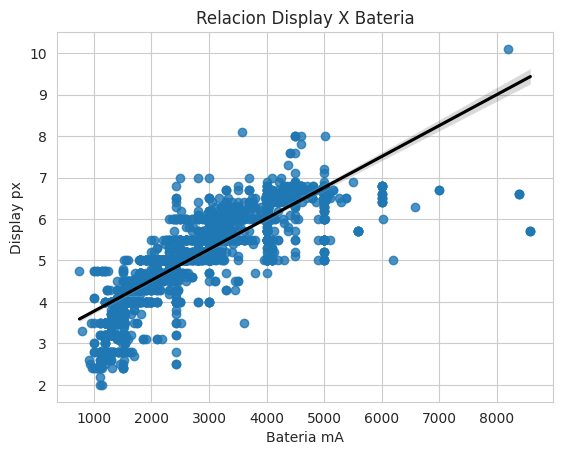

In [ ]:
Bateria=df.Battery
Display=df.Display_Size

sns.regplot(x=Bateria,
            y=Display,
            line_kws={'color': 'black'})

plt.title('Relacion Display X Bateria')
plt.xlabel('Bateria mA')
plt.ylabel('Display px')
plt.show()

Teniendo esta grafica, la cual presenta un diagrama de dispersion y su recta regresora, podemos concluir visualmente, que a mayor cantidad de pixeles en el display, requerira una mayor capacidad de batería.<br>

Cabe aclarar que para hacer un analisis aun mas profundo se requeriría tener en cuenta la tecnologia utilizada, pues hoy en dia se ha logrado una mayor calidad y cantidad de pixeles a menor coste energetíco que los primeros dispositivos del mercado.<br>

(Para nuestro caso, no nos interesa, pero nunca esta demás aclarar)

## Tops

### Sistemas Operativos más presentes

Una característica importante, es el **sistema operativo** quien se encarga de  administrar tanto los recursos del dispositivo como las interacciones entre los distintos componentes

In [ ]:
#Nuestro Dataframe contiene tanto el nombre del SO como su version, a nosotros solo nos interesa solo el nombre, ademas que nos permitira clasificar mejor.
#Se crea una lista que recorre los valores y los separa por espacios, tomando solo la primera palabra (Nombre del SO)
marcas = list(df_text["OS"])
lista=[]
for i in marcas:
    lista.append(str(i).split()[0])

In [ ]:
#Se reemplaza la columna OS por la nueva lista sin las versiones
df_text.OS=lista

In [ ]:
#Visualizacion de como quedó
df_text.head(5)

,Brand,Model,OS,Battery,Processor,Memory,Primary_Storage,External_Storage,Display_Size,Display_Resolution,Primary_Camera,Front_Camera
0,ARCHOS,40 Cesium,Windows,1950.0,Qualcomm Snapdragon 200,0.5,4.000000,microSDXC,4.0,800 x 480,5.0,0.3
1,ARCHOS,40 Titanium,Android,1500.0,MediaTek,0.5,34.296597,microSDHC,4.0,800 x 480,5.0,0.3
2,ARCHOS,40b Titanium,Android,1400.0,MediaTek,0.5,4.000000,microSD,4.0,800 x 480,5.0,0.3
3,ARCHOS,45 Titanium,Android,1680.0,MediaTek,0.5,34.296597,microSDHC,4.5,854 x 480,5.0,0.3
4,ARCHOS,45b Helium 4G,Android,1850.0,Qualcomm Snapdragon 410,0.5,4.000000,microSDXC,4.5,854 x 480,5.0,0.3


In [ ]:
px.bar(df_text.OS.value_counts().head(5),title="Top 5 Sistemas Operativos más usados",labels={'value':'Cantidad de telefonos',
                                                                                              'index':'Sistemas Operativos',
                                                                                              'variable':''})

|Android|Windows|iOS|BlackBerry|Firefox|
|--|--|--|--|--|
|2612|149|27|11|5|

Con una simple visualizacion, podemos ver el interés de los fabricantes por utilizar Android.<br>
Cabe aclarar que dentro de las alternativas, Android al ser un SO abierto,permitir adecuaciones personalizadas y de la mano de una gran comunidad, es la mejor opcion para muchos desarrolladores.<br>
Caso diferente para los sistemas como Windows e iOS que ya dependen de una licencia para ser utilizados, ademas que suelen ser solo para uso exclusivo de sus fabricantes (iOS-Apple)<br>
Aclarado esto, es entendible la gran diferencia de dispositivos que cuentan con estos SO<br>

### Marcas con mayor aportes

Como casi todo en la vida, las grandes marcas suelen ser quienes producen la gran mayoria de los productos que consumimos, por lo que es importante saber quienes han sido las marcas mas 'Aportantes' en cuestiones de datos en nuestro dataset

In [ ]:
#Agrupamos los datos por marca y los ordenamos de mayor a menor según la cantidad de datos/dispositivos que presenten en este dataset
top_10_marcas=df_text.groupby(by='Brand').size().sort_values(ascending=False).head(10)

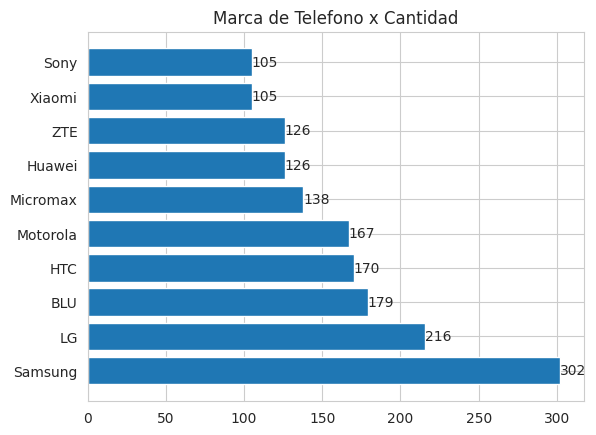

In [ ]:
fig, ax = plt.subplots()
barras = ax.barh(top_10_marcas.index, top_10_marcas.values)
plt.title('Marca de Telefono x Cantidad')
ax.bar_label(barras) #Muestra la cantidad acumulada de valores de la categoria
plt.show()

# Proceso de KMeans y hallazgos de grupos

## Clusterizacion

Ahora teniendo la informacion general y bien visualizada acerca de nuestro dataset, se continua con el objetivo principal de nuestro proyecto

In [ ]:
df_num

,Battery,Memory,Primary_Storage,Display_Size,Primary_Camera,Front_Camera
0,1950.0,0.5,4.000000,4.0,5.0,0.3
1,1500.0,0.5,34.296597,4.0,5.0,0.3
2,1400.0,0.5,4.000000,4.0,5.0,0.3
3,1680.0,0.5,34.296597,4.5,5.0,0.3
4,1850.0,0.5,4.000000,4.5,5.0,0.3
...,...,...,...,...,...,...
4532,5000.0,3.0,32.000000,6.3,13.0,8.0
4533,5000.0,4.0,128.000000,6.5,16.0,16.0
4534,3260.0,4.0,64.000000,6.2,13.0,8.0
4535,4030.0,2.0,32.000000,6.2,13.0,8.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

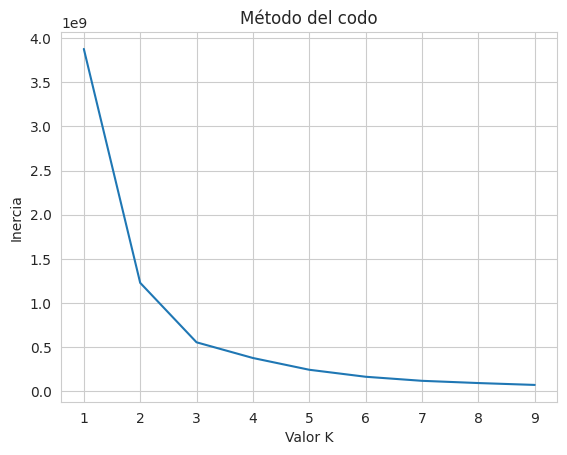

In [ ]:
#Utilizamos el método del codo para encontrar la cantidad de agrupaciones optimas para clasificar a nuestro dataset
inercia = []
K = range(1,10)
for clusters in K :
 kmeans = KMeans(n_clusters=clusters)
 kmeans.fit(df_num)
 inercia.append(kmeans.inertia_)

plt.plot(K,inercia)

plt.title('Método del codo')
plt.xlabel('Valor K') 
plt.ylabel('Inercia') 

plt.show()

::En esta caso elegimos 3 agrupaciones por observacion del codo y tambien por tratar de segmentar un poco más a los datos

In [ ]:
df_text

,Brand,Model,OS,Battery,Processor,Memory,Primary_Storage,External_Storage,Display_Size,Display_Resolution,Primary_Camera,Front_Camera
0,ARCHOS,40 Cesium,Windows,1950.0,Qualcomm Snapdragon 200,0.5,4.000000,microSDXC,4.0,800 x 480,5.0,0.3
1,ARCHOS,40 Titanium,Android,1500.0,MediaTek,0.5,34.296597,microSDHC,4.0,800 x 480,5.0,0.3
2,ARCHOS,40b Titanium,Android,1400.0,MediaTek,0.5,4.000000,microSD,4.0,800 x 480,5.0,0.3
3,ARCHOS,45 Titanium,Android,1680.0,MediaTek,0.5,34.296597,microSDHC,4.5,854 x 480,5.0,0.3
4,ARCHOS,45b Helium 4G,Android,1850.0,Qualcomm Snapdragon 410,0.5,4.000000,microSDXC,4.5,854 x 480,5.0,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...
4532,vivo,Y11,Android,5000.0,Qualcomm Snapdragon 439,3.0,32.000000,microSDXC,6.3,1544 x 720,13.0,8.0
4533,vivo,Y19,Android,5000.0,MediaTek Helio P65,4.0,128.000000,microSDXC,6.5,2340 x 1080,16.0,16.0
4534,vivo,Y83 Pro,Android,3260.0,MediaTek Helio P22,4.0,64.000000,microSDXC,6.2,1520 x 720,13.0,8.0
4535,vivo,Y91,Android,4030.0,MediaTek Helio P22,2.0,32.000000,microSDXC,6.2,1520 x 720,13.0,8.0


In [ ]:
#Entrenamiento y asignacion de los grupos encontrados con sus respectivos valores
kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit_transform(df_num)
df_text['Cluster']=kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
df_cluster=df_text.groupby(['Cluster','Brand']).mean().round(2).reset_index()

<ipython-input-230-8e472a09c9a7>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
print(f'Cantidad de Marcas entrantes en cluster 0 =',len(df_cluster.where(df_cluster.Cluster==0).dropna().Brand.unique()))
print(f'Cantidad de Marcas entrantes en cluster 1 =',len(df_cluster.where(df_cluster.Cluster==1).dropna().Brand.unique()))
print(f'Cantidad de Marcas entrantes en cluster 2 =',len(df_cluster.where(df_cluster.Cluster==2).dropna().Brand.unique()))

Cantidad de Marcas entrantes en cluster 0 = 67
Cantidad de Marcas entrantes en cluster 1 = 48
Cantidad de Marcas entrantes en cluster 2 = 62


## Cluster 0

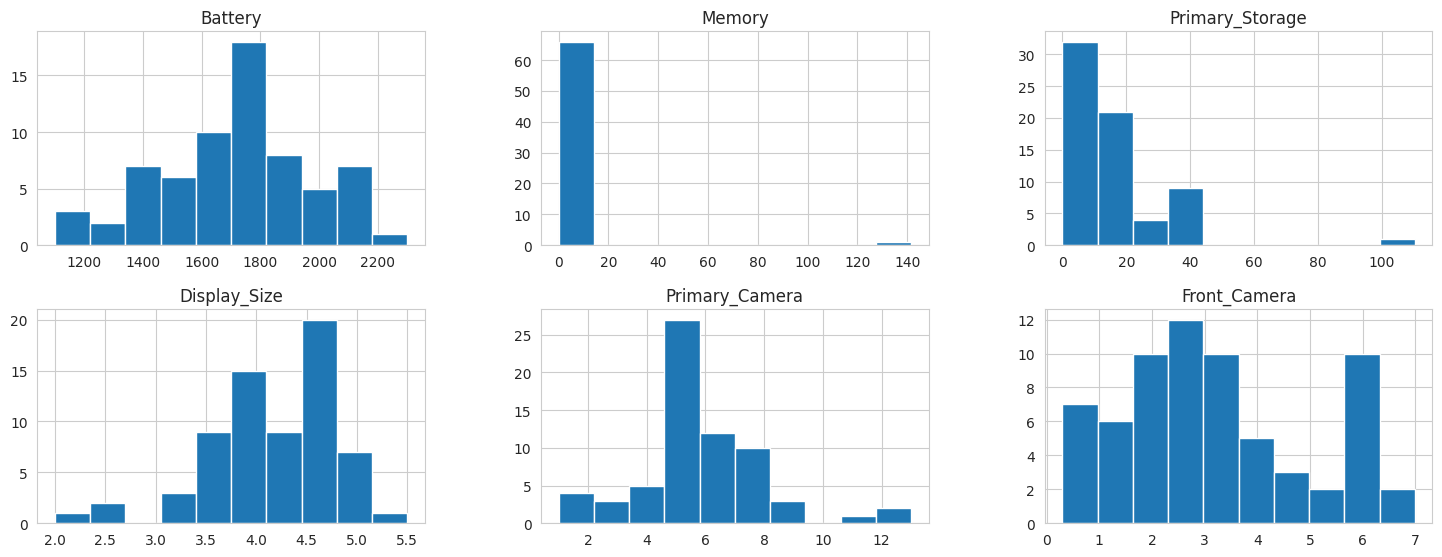

In [ ]:
df_cluster.where(df_cluster.Cluster==0).dropna().drop(columns=['Brand','Cluster']).hist(layout=[3,3],figsize=[18,10])
plt.show()

In [ ]:
df_cluster.where(df_cluster.Cluster==0).dropna().drop(columns=['Brand','Cluster']).describe().T

,count,mean,std,min,25%,50%,75%,max
Battery,67.0,1713.751642,264.497231,1100.00,1500.000,1750.00,1886.145,2300.00
Memory,67.0,3.065821,17.176252,0.06,0.600,0.84,1.160,141.48
Primary_Storage,67.0,15.767463,15.405869,0.00,7.310,11.56,20.485,110.22
Display_Size,67.0,4.154179,0.631780,2.00,3.825,4.26,4.555,5.50
Primary_Camera,67.0,5.934627,2.186970,1.00,5.000,5.61,6.895,13.00
Front_Camera,67.0,3.174627,1.818678,0.30,1.905,2.84,4.255,6.99


## Cluster 1

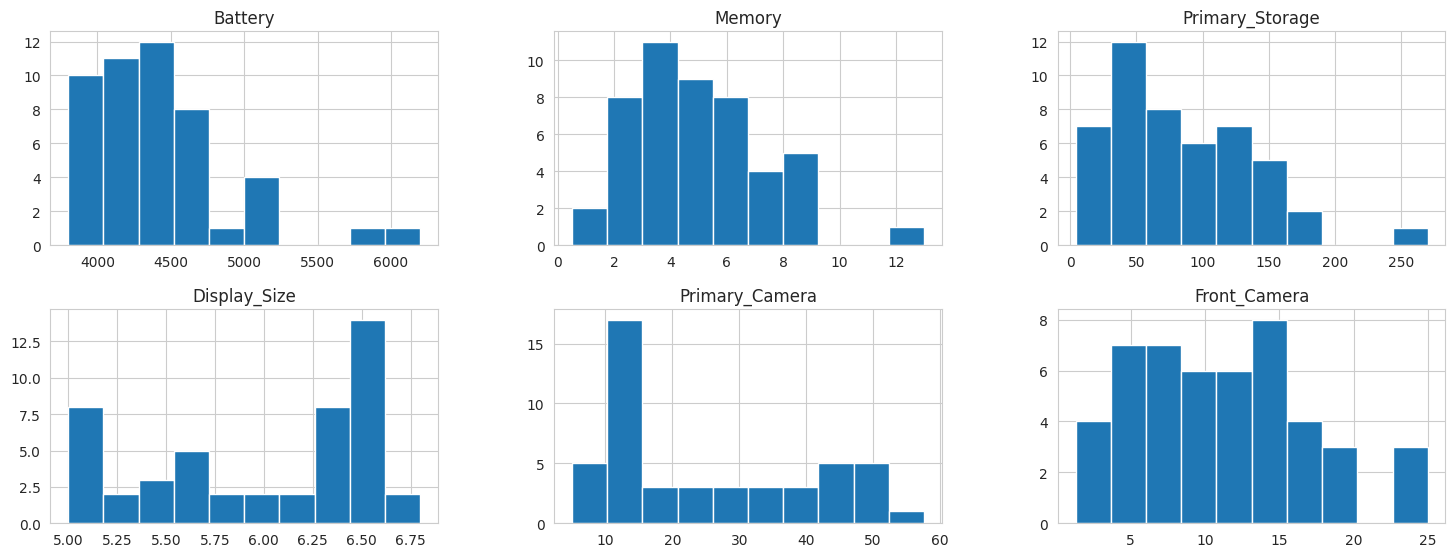

In [ ]:
df_cluster.where(df_cluster.Cluster==1).dropna().drop(columns=['Brand','Cluster']).hist(layout=[3,3],figsize=[18,10])
plt.show()

In [ ]:
df_cluster.where(df_cluster.Cluster==1).dropna().drop(columns=['Brand','Cluster']).describe().T

,count,mean,std,min,25%,50%,75%,max
Battery,48.0,4436.798125,458.992277,3800.0,4118.7500,4374.015,4624.6025,6200.00
Memory,48.0,4.890208,2.411357,0.5,3.0675,4.825,6.0025,13.00
Primary_Storage,48.0,83.291667,55.752282,4.0,41.2000,68.870,128.0000,270.22
Display_Size,48.0,5.976667,0.576177,5.0,5.5000,6.230,6.4775,6.80
Primary_Camera,48.0,24.933542,15.441216,5.0,12.0000,19.355,39.7825,57.62
Front_Camera,48.0,11.123542,5.762050,1.3,6.9500,10.805,15.0075,25.00


## Cluster 2

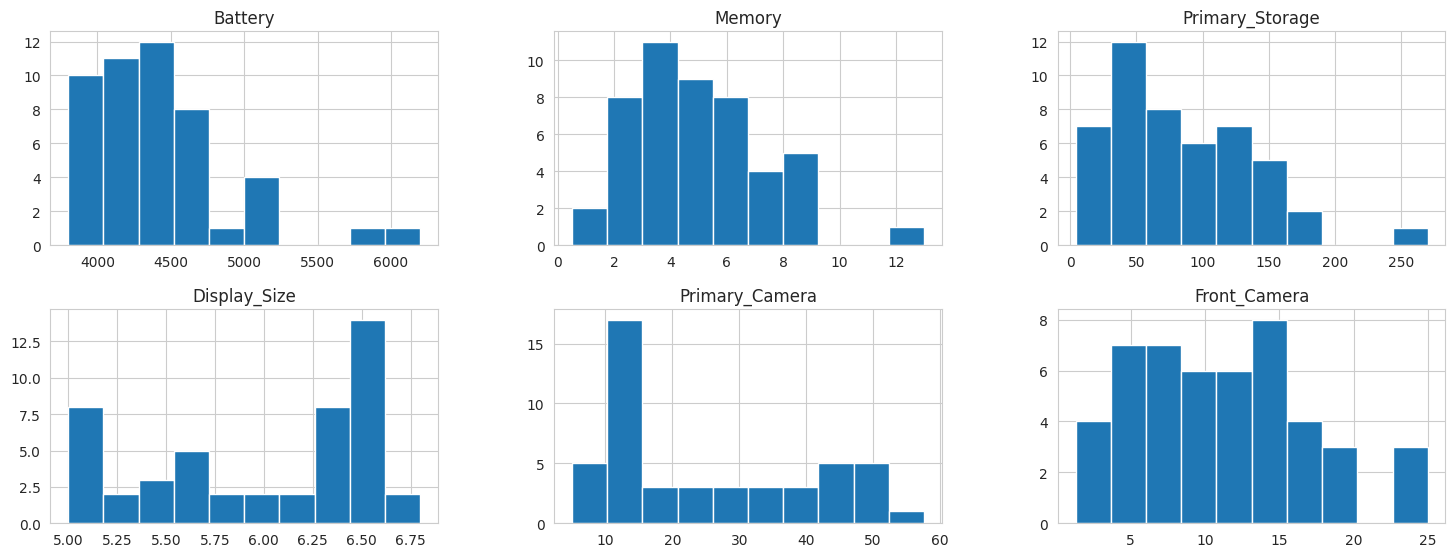

In [ ]:
df_cluster.where(df_cluster.Cluster==1).dropna().drop(columns=['Brand','Cluster']).hist(layout=[3,3],figsize=[18,10])
plt.show()

In [ ]:
df_cluster.where(df_cluster.Cluster==2).dropna().drop(columns=['Brand','Cluster']).describe().T

,count,mean,std,min,25%,50%,75%,max
Battery,62.0,2868.942419,246.275612,2388.36,2731.1325,2906.610,3010.1550,3380.00
Memory,62.0,2.336935,1.171009,0.25,1.5000,2.310,2.9950,6.83
Primary_Storage,62.0,33.574355,27.651933,0.00,15.0775,30.855,40.2175,152.00
Display_Size,62.0,5.271129,0.596556,2.50,5.1775,5.390,5.5500,6.13
Primary_Camera,62.0,11.367419,5.000032,0.00,8.0000,11.540,14.0750,30.00
Front_Camera,62.0,5.816613,3.697915,0.30,2.9750,5.490,7.2100,16.83


## Conclusion del Clustering

Con esta Clasificacion, cuando vemos los promedios de los valores, podemos ver que nos llega a clasificar en telefonos con características que podriamos decir que son
de baja, media y alta gama, siendo casi todos los componentes de valores bastante diferente entre cada agrupacion, aunque observando bien, podemos visualizar que hay 2 componentes que presentan<br>
practicamente la misma característica en todos los agrupamientos.
Estos son la **Memoria**, el tamaño de **Display**.<br>

Por lo que podemos decir que:<br>

Cluster 0 agrupa a los telefono de Gama Baja<br>
Cluster 1 agrupa a los telefono de Gama Alta<br>
Cluster 2 agrupa a los telefono de Gama Media<br>

# Evaluacion ML


Proponiendo otra visualizacion ahora enfocada en la comparacion entre bateria y memoria, se hace una primera impresion sin realizar un tratado de la información

<Axes: xlabel='Battery', ylabel='Memory'>

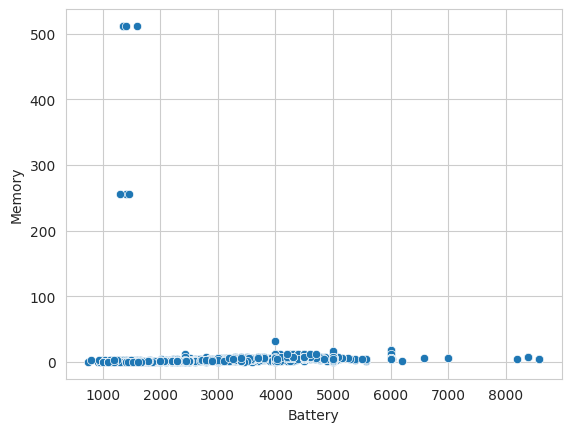

In [ ]:
sns.scatterplot(x=df.Battery,y=df.Memory)

Se procede a realizar un PCA para disminuir las columnas del df tratando de mantener la mayor informacion posible que describa al conjunto y se aplica un StandarScaler

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
df.drop(columns='Model',inplace=True)

In [ ]:
#Se aplican PCA y la varianza ratio para ver la importancia de las columnas con respecto a los datos
for i in range(0,6):
 print(i)
 print(PCA(i,random_state=0).fit(df).explained_variance_ratio_.round(3))
 i+=i

0
[]
1
[0.992]
2
[0.992 0.004]
3
[0.992 0.004 0.002]
4
[0.992 0.004 0.002 0.001]
5
[0.992 0.004 0.002 0.001 0.   ]


Se decide tomar del 0 al 5 como columnas para representar el 0.99 de los datos del comienzo

In [ ]:
df_standar=StandardScaler().fit_transform(df)

In [ ]:
df_standar

array([[-1.7469523 , -0.71754542,  0.01780301, ...,  1.21770998,
        -0.56885741, -0.9491003 ],
       [-1.7469523 , -1.10164262, -1.16383417, ...,  1.21770998,
        -0.56885741, -0.9491003 ],
       [-1.7469523 , -1.18699755, -1.16383417, ...,  1.21770998,
        -0.56885741, -0.9491003 ],
       ...,
       [ 1.76155153,  0.4006042 , -0.77880633, ..., -1.00384238,
        -0.10799682,  0.15771816],
       [ 1.76155153,  1.05783718, -0.77880633, ..., -1.00384238,
        -0.10799682,  0.15771816],
       [ 1.76155153,  1.05783718, -0.77880633, ..., -1.00384238,
        -0.10799682,  0.15771816]])

In [ ]:
standar=StandardScaler()
standar.fit_transform(df)
df_pca=PCA(n_components=5,random_state=0).fit_transform(df)

In [ ]:
df_standar=pd.DataFrame(data=df_pca,columns=['Brand','Battery','Processor','Memory','Primary_Storage'])

Una vez realizado el proceso de transformación y adecuacion de los datos, nuevamente mostramos los datos

<Axes: xlabel='Battery', ylabel='Memory'>

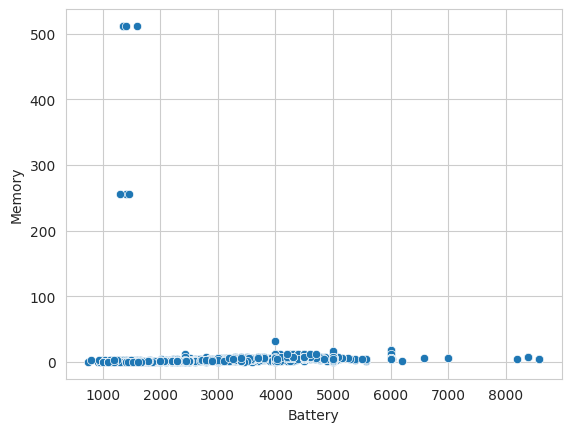

In [ ]:
sns.scatterplot(x=df.Battery,y=df.Memory)

Sin la necesidad de realizar una clusterizacion, podemos visualizar como hay un comportamiento de densidad en la seccion inferior del gráfico, lo que podria indicar que hay un comportamiento radial o de rango aceptable para valores entre la memoria y bateria que mantienen las empresas telefónicas.
Uno de los aspectos importantes que trae esta nueva visualizacion, es que no es tan lineal como la inicial, dando a entender que hay un mayor dinamica que del que se cree a simple vista

En conclusion, por medio de este tratamiento alternativo de los datos, se podria visualizar los datos sin la necesidad de producir algoritmos de clustering

# Feature Selection - Agrupacion con menos columnas

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
df_2=df.drop(columns=['Primary_Camera','Front_Camera','External_Storage'])
df_2

,Brand,Battery,Processor,Memory,Primary_Storage,Display_Size,Display_Resolution
0,0,1950.0,135,0.5,4.000000,4.0,111
1,0,1500.0,46,0.5,34.296597,4.0,111
2,0,1400.0,46,0.5,4.000000,4.0,111
3,0,1680.0,46,0.5,34.296597,4.5,112
4,0,1850.0,140,0.5,4.000000,4.5,112
...,...,...,...,...,...,...,...
4532,85,5000.0,147,3.0,32.000000,6.3,17
4533,85,5000.0,80,4.0,128.000000,6.5,50
4534,85,3260.0,75,4.0,64.000000,6.2,16
4535,85,4030.0,75,2.0,32.000000,6.2,16


In [ ]:
df_standar=RobustScaler().fit_transform(df_2)

In [ ]:
#Se toma 4 debido a que ya se consigue un 0.99 de recreacion de los datos
for i in range(0,6):
 print(i)
 print(PCA(i,random_state=0).fit(df_standar).explained_variance_ratio_.round(3).sum())
 i+=i

0
0.0
1
0.94
2
0.973
3
0.983
4
0.992
5
0.996


In [ ]:
df_standar_2=PCA(4,random_state=0).fit_transform(df_standar)

Realizo el metodo de la silueta para encontrar la cantidad adecuada de Agrupaciones

In [ ]:
silhouette=[]
for i in range(2,10):
 kmeans=KMeans(n_clusters=i)
 kmeans.fit_transform(df_standar_2)
 silhouette.append(silhouette_score(df_standar_2,kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

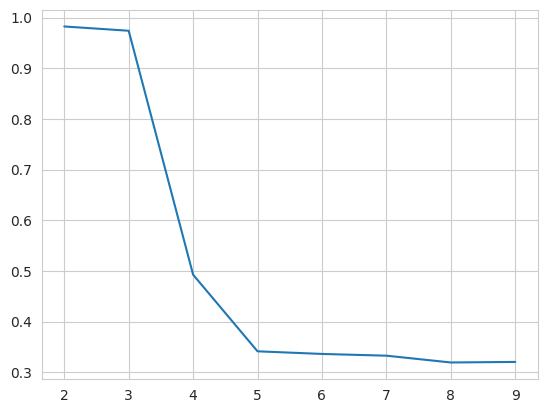

In [ ]:
plt.plot(range(2,10),silhouette)

igual que en el caso principal del desafio, tenemos que con 3 clusters, ya podemos separar de forma prolija al Dataframe

In [ ]:
 kmeans=KMeans(n_clusters=3)
 kmeans.fit_transform(df_standar_2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([[  1.81833402, 170.51414296,  85.19486617],
       [  1.87303065, 170.51830693,  85.20189672],
       [  2.02132657, 170.51755821,  85.19979706],
       ...,
       [  1.53285042, 169.35194826,  84.03958689],
       [  1.68833241, 170.02069192,  84.71023624],
       [  1.7557332 , 169.35643209,  84.04916715]])

In [ ]:
df_2['Cluster']=kmeans.labels_
df_2.Cluster.value_counts()

0    2809
1       4
2       3
Name: Cluster, dtype: int64

Utilizando menos columnas de las iniciales, siendo los componentes de la camara y el almacenamiento externo como datos sin uso, podemos visualizar en la segmentacion, que no se ha logrado dividir de una forma mas equilibrada al Dataframe.<br>

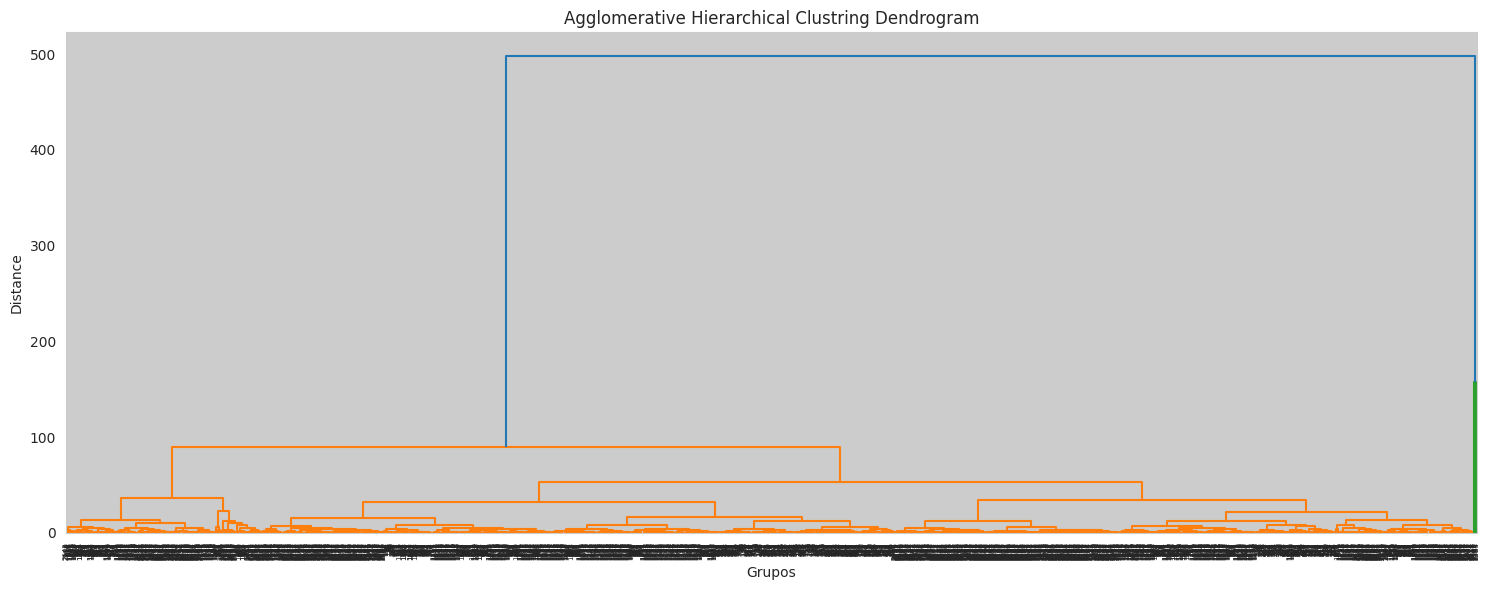

In [ ]:
#Se realiza otro modo de clustering (Agrupacion jerarquica)
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

link = linkage(df_standar_2, metric = 'euclidean', method = 'ward')

plt.figure(figsize = (15,6))
plt.title('Agglomerative Hierarchical Clustring Dendrogram')
plt.xlabel('Grupos')
plt.ylabel('Distance')
dendrogram(link)
plt.tight_layout()

In [ ]:
from sklearn.cluster import AgglomerativeClustering as agc

AGC = agc(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
AGC.fit(df_standar_2)
Cluster_AGC = pd.Series(AGC.labels_)
print(pd.concat({'count' : Cluster_AGC.value_counts(), 
                 'percent' : round(Cluster_AGC.value_counts(normalize = True)*100, 2)}, 
                axis = 1 ))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



   count  percent
0   2809    99.75
1      4     0.14
2      3     0.11


Ya desde un primer vistazo, tenemos que este algoritmo, encontro la misma solucion que el KMeans para agrupar los datos, al menos en cantidad para cada grupo, por lo que ambos Score de comparacion seran identicos

In [ ]:
from sklearn.metrics import silhouette_score as sil_score
from sklearn.metrics import davies_bouldin_score
print('Silhouette Score:', '%.2f'%sil_score(df_standar_2, df_2['Cluster']))
print('Davies Bouldin Score:', '%.2f'%davies_bouldin_score(df_standar_2, df_2['Cluster']))

Silhouette Score: 0.97
Davies Bouldin Score: 0.02


In [ ]:
print('Silhouette Score:', '%.2f'%sil_score(df_standar_2, Cluster_AGC))
print('Davies Bouldin Score:', '%.2f'%davies_bouldin_score(df_standar_2, Cluster_AGC))

Silhouette Score: 0.97
Davies Bouldin Score: 0.02


Por lo que se concluye, que esta segmentancion de los datos, aunque parezca dispareja, es la mejor forma que ambos algoritmos presentan para clasificar los datos del comienzo (Recordando que para esta ocasion, se eliminaron columnas importantes para los telefonos como la Cámara)

# DataFrame Final

In [ ]:
#Para mayor legibilidad, se reemplaza los valores cluster con la conclusion de las características
df_text.Cluster.replace([0,1,2],['Gama Baja','Gama Alta','Gana Media'],inplace=True)
df_text

,Brand,Model,OS,Battery,Processor,Memory,Primary_Storage,External_Storage,Display_Size,Display_Resolution,Primary_Camera,Front_Camera,Cluster
0,ARCHOS,40 Cesium,Windows,1950.0,Qualcomm Snapdragon 200,0.5,4.000000,microSDXC,4.0,800 x 480,5.0,0.3,Gama Baja
1,ARCHOS,40 Titanium,Android,1500.0,MediaTek,0.5,34.296597,microSDHC,4.0,800 x 480,5.0,0.3,Gama Baja
2,ARCHOS,40b Titanium,Android,1400.0,MediaTek,0.5,4.000000,microSD,4.0,800 x 480,5.0,0.3,Gama Baja
3,ARCHOS,45 Titanium,Android,1680.0,MediaTek,0.5,34.296597,microSDHC,4.5,854 x 480,5.0,0.3,Gama Baja
4,ARCHOS,45b Helium 4G,Android,1850.0,Qualcomm Snapdragon 410,0.5,4.000000,microSDXC,4.5,854 x 480,5.0,0.3,Gama Baja
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4532,vivo,Y11,Android,5000.0,Qualcomm Snapdragon 439,3.0,32.000000,microSDXC,6.3,1544 x 720,13.0,8.0,Gama Alta
4533,vivo,Y19,Android,5000.0,MediaTek Helio P65,4.0,128.000000,microSDXC,6.5,2340 x 1080,16.0,16.0,Gama Alta
4534,vivo,Y83 Pro,Android,3260.0,MediaTek Helio P22,4.0,64.000000,microSDXC,6.2,1520 x 720,13.0,8.0,Gana Media
4535,vivo,Y91,Android,4030.0,MediaTek Helio P22,2.0,32.000000,microSDXC,6.2,1520 x 720,13.0,8.0,Gama Alta


# Conclusion Final - Cierre

Se ha logrado realizar una clasificacion de los dispositivos en 3 grupos.<br>
Cabe aclarar que los resultados finales son en base a todo el DataFrame sin hacer distincion de fechas de lanzamientos y los procesadores asociados,
ya que no se cuenta con los datos asociados.<br>
Por lo que a final de cuentas, esta presentacion final nos sirve para hacer una rapida comparacion entre dispositivos para la toma de decision con respecto a compra/venta o simplemente de modo informativo.<br>

Se pudo observar que hay ciertos componentes que respetan una cierta linealidad / correlacion entre ellas (aspecto muy importante si se busca fabricar) y otros que permanecen con valores mas constantes o valores optimos que satisfacen en general la demanda de los usuarios.

Otra informacion obtenida y de gran importancia, es la importancia de la camara del mismo (al menos en gran medida la trasera).
Siendo de vital importancia para decidir catalogar un dispositivo como competidor de baja, media o alta gama.